In [1]:
import json
import torch
import torch.utils.data as td
import torch.nn as nn
import torch.optim as optim
import os
from matplotlib import pyplot as plt
import random
import config
from encoder import Wsl_encoder
from decoder import Decoder
import utils

%load_ext autoreload
%autoreload 2

Loading of the word dictionary (vocabulary) and the testing image paths

In [3]:
word_dict = json.load(open(config.WORD_DICT, 'r'))
vocabulary_size = len(word_dict)
test_img_paths = json.load(open('./data/test_img_paths.json'))

Loading the Pretrained Model

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"device = {device}")

device = cuda


In [ ]:
tf_ratio = 0        # Teacher Forcing is used always
lr = 4e-4           # Learning rate
batch_size = 4     # Batch size for mini-batch gradient descent
step_size = 5       # Step size for learning rate annealing
alpha_c = 1         # Regularization constant
start_epoch = 4     # Starting epoch for the experiment
log_interval = 100  # Frequency for logging statistics

log_filename = config.LOG_FILE

encoder = Wsl_encoder()
decoder = Decoder(device, vocabulary_size, config.ENCODER_DIM, tf_ratio=config.TF_RATIO)
optimizer = optim.Adam(decoder.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size)
cross_entropy_loss = nn.CrossEntropyLoss()

In [7]:
trained_model_path = r'./data/models/model_7.pth.tar'
decoder.load_state_dict(torch.load(trained_model_path)['state_dict'])

# Set the encoder and decoder in evaluation mode to get captions for testing data
encoder.eval()
decoder.eval()

Decoder(
  (init_h): Linear(in_features=2048, out_features=512, bias=True)
  (init_c): Linear(in_features=2048, out_features=512, bias=True)
  (tanh): Tanh()
  (f_beta): Linear(in_features=512, out_features=2048, bias=True)
  (sigmoid): Sigmoid()
  (deep_output): Linear(in_features=512, out_features=21580, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (attention): Attention(
    (U): Linear(in_features=512, out_features=512, bias=True)
    (W): Linear(in_features=2048, out_features=512, bias=True)
    (v): Linear(in_features=512, out_features=1, bias=True)
    (tanh): Tanh()
    (softmax): Softmax(dim=1)
  )
  (embedding): Embedding(21580, 512)
  (lstm): LSTM(2560, 512)
)

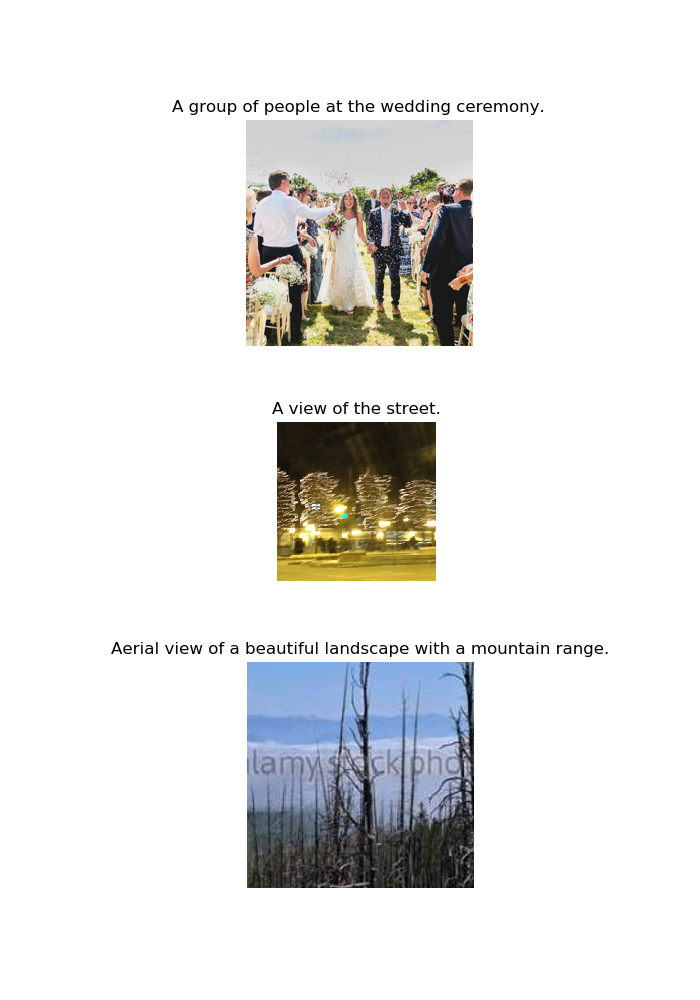

In [13]:
beam_sizes = [3]
fig, axes = plt.subplots(nrows=len(beam_sizes), figsize=(7,10))

utils.generate_image_caption(encoder, decoder, config.DATA_DIR + test_img_paths['4'], word_dict, axes, beam_sizes)
utils.generate_image_caption(encoder, decoder, config.DATA_DIR + test_img_paths['8'], word_dict, axes, beam_sizes)
utils.generate_image_caption(encoder, decoder, config.DATA_DIR + test_img_paths['15'], word_dict, axes, beam_sizes)

Incorrectly Captioned Images on the Testing Dataset

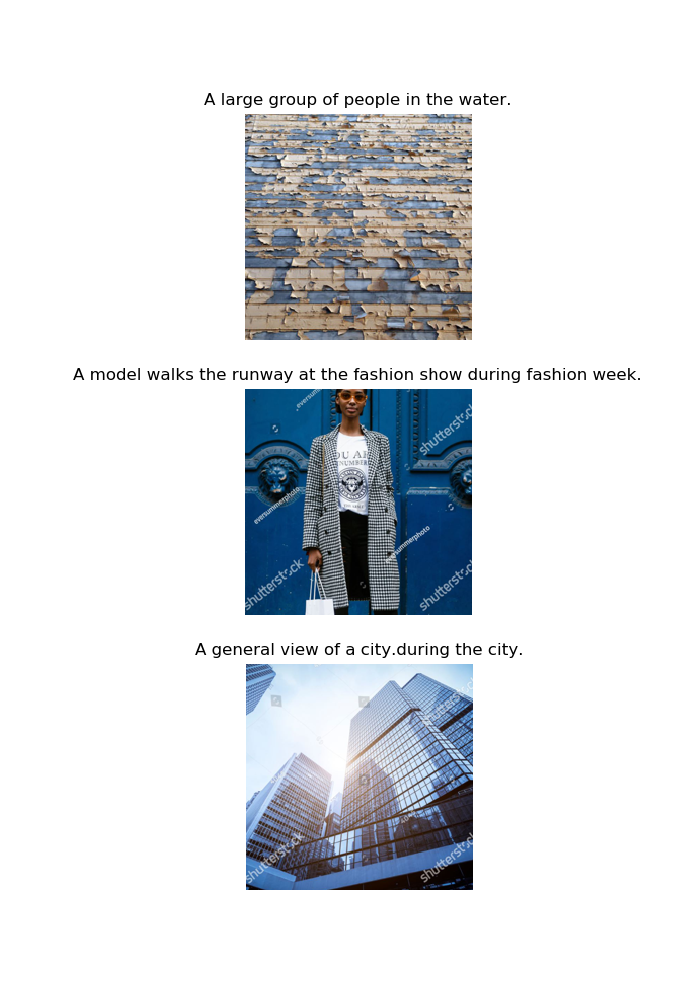

In [14]:
beam_sizes = [3]
fig, axes = plt.subplots(nrows=len(beam_sizes), figsize=(7,10))

utils.generate_image_caption(encoder, decoder, config.DATA_DIR + test_img_paths['16'], word_dict, axes, beam_sizes)
utils.generate_image_caption(encoder, decoder, config.DATA_DIR + test_img_paths['23'], word_dict, axes, beam_sizes)
utils.generate_image_caption(encoder, decoder, config.DATA_DIR + test_img_paths['42'], word_dict, axes, beam_sizes)

Visualization of Attention and the Corresponding Caption Generation

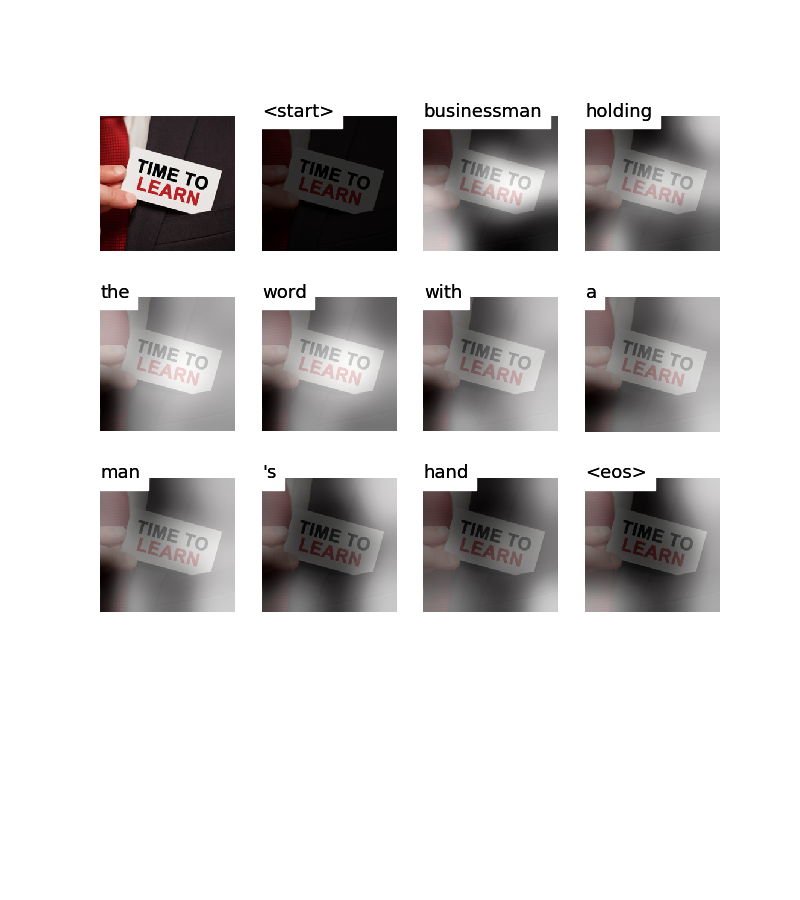

In [15]:
utils.generate_caption_visualization(encoder, decoder, config.DATA_DIR + test_img_paths['108'], word_dict)

Progression of the Captions over the epochs

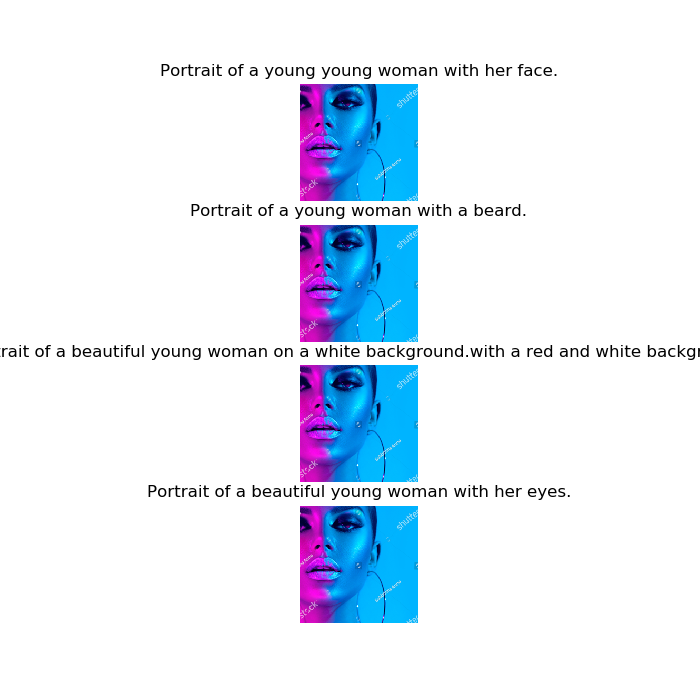

In [16]:
beam_sizes = [3]
fig, axes = plt.subplots(nrows=4, figsize=(7,7))

encoder1 = Wsl_encoder()
decoder1 = Decoder(device, vocabulary_size, config.ENCODER_DIM, tf_ratio=config.TF_RATIO)
trained_model_path = r'../data/models/model_3.pth.tar'
decoder1.load_state_dict(torch.load(trained_model_path)['state_dict'])
encoder1.eval()
decoder1.eval()

encoder2 = Wsl_encoder()
decoder2 = Decoder(device, vocabulary_size, config.ENCODER_DIM, tf_ratio=config.TF_RATIO)
trained_model_path = r'../data/models/model_5.pth.tar'
decoder2.load_state_dict(torch.load(trained_model_path)['state_dict'])
encoder2.eval()
decoder2.eval()

encoder3 = Wsl_encoder()
decoder3 = Decoder(device, vocabulary_size, config.ENCODER_DIM, tf_ratio=config.TF_RATIO)
trained_model_path = r'../data/models/model_7.pth.tar'
decoder3.load_state_dict(torch.load(trained_model_path)['state_dict'])
encoder3.eval()
decoder3.eval()

utils.generate_image_caption(encoder1, decoder1, config.DATA_DIR + test_img_paths['0'], word_dict, axes, beam_sizes)
utils.generate_image_caption(encoder2, decoder2, config.DATA_DIR + test_img_paths['0'], word_dict, axes, beam_sizes)
utils.generate_image_caption(encoder3, decoder3, config.DATA_DIR + test_img_paths['0'], word_dict, axes, beam_sizes)
utils.generate_image_caption(encoder, decoder, config.DATA_DIR + test_img_paths['0'], word_dict, axes, beam_sizes)

Variations in Generated Captions with Beamsize

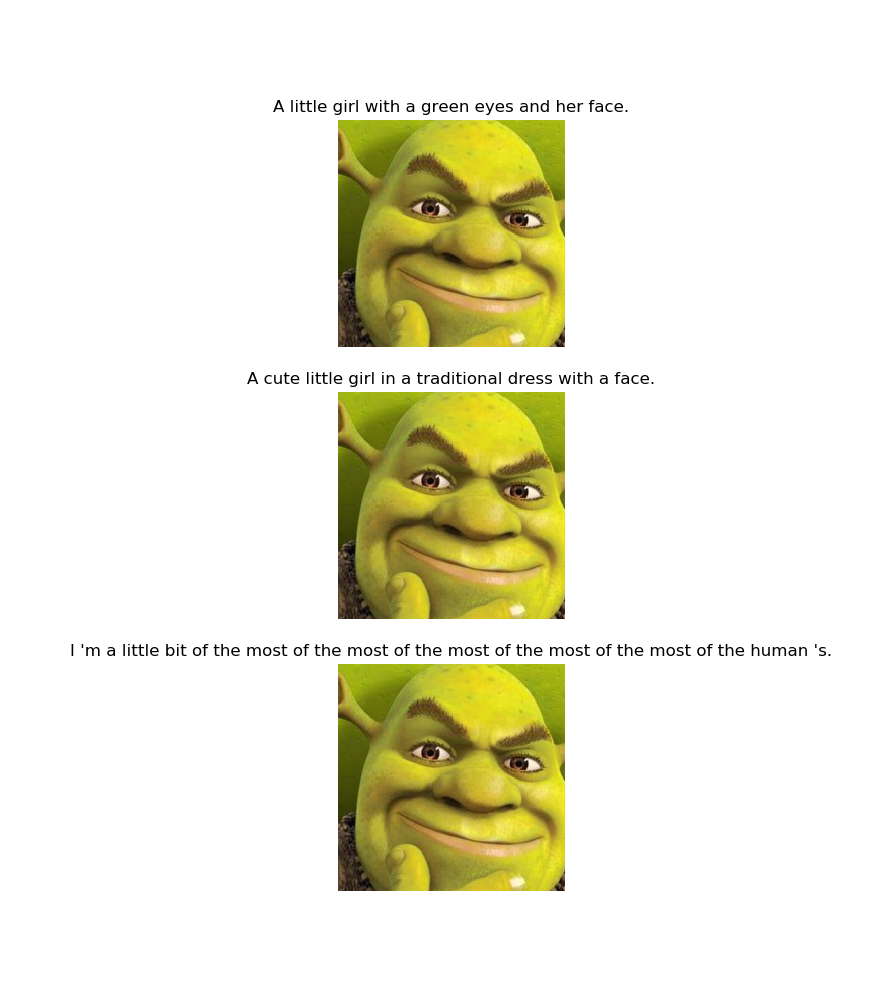

In [17]:
beam_sizes = config.BEAM_SIZES
fig, axes = plt.subplots(nrows=len(beam_sizes), figsize=(7,10))

utils.generate_image_caption(encoder, decoder, config.DATA_DIR + test_img_paths['1'], word_dict, axes, beam_sizes)